In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data 
mp_path = r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\zeno_video_output\BW-0002\2022_09_12\000_raw_pose_data\gait_vertical_FW_1_mediapipe.csv'
mp_world_path = r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\zeno_video_output\BW-0002\2022_09_12\000_raw_pose_data\gait_vertical_FW_1_mediapipe_world.csv'
mgold_path = r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\zeno_video_output\BW-0002\2022_09_12\000_raw_pose_data\gait_vertical_FW_1_marigold.csv'
yolo_path = r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\zeno_video_output\BW-0002\2022_09_12\000_raw_pose_data\gait_vertical_FW_1_yolo.csv'

mp_df = pd.read_csv(mp_path, index_col = 0)
mp_world_df = pd.read_csv(mp_world_path, index_col = 0) 
mgold_df = pd.read_csv(mgold_path, index_col = 0)
yolo_df = pd.read_csv(yolo_path, index_col = 0)

In [3]:
mgold_df.head()

,frame,label,depth_est
0,0,NaN,inf
0,1,NaN,inf
0,2,NaN,inf
0,3,NaN,inf
0,4,NaN,inf


In [4]:
mgold_df['label'].value_counts()

label
nose                4
left_pinky          4
left_foot_index     4
right_heel          4
left_heel           4
right_ankle         4
left_ankle          4
right_knee          4
left_knee           4
right_hip           4
left_hip            4
right_thumb         4
left_thumb          4
right_index         4
left_index          4
right_pinky         4
right_wrist         4
left_eye_inner      4
left_wrist          4
right_elbow         4
left_elbow          4
right_shoulder      4
left_shoulder       4
mouth_right         4
mouth_left          4
right_ear           4
left_ear            4
right_eye_outer     4
right_eye           4
right_eye_inner     4
left_eye_outer      4
left_eye            4
right_foot_index    4
Name: count, dtype: int64

In [5]:
# make label categorical 
mgold_df['label'] = mgold_df['label'].astype('category')
mgold_df.dtypes

frame           int64
label        category
depth_est     float64
dtype: object

In [6]:
# drop nan vals and check which frames have data 
mgold_df = mgold_df.dropna(subset = ['label'])
mgold_df['frame'].value_counts()

frame
120    33
240    33
270    33
420    33
Name: count, dtype: int64

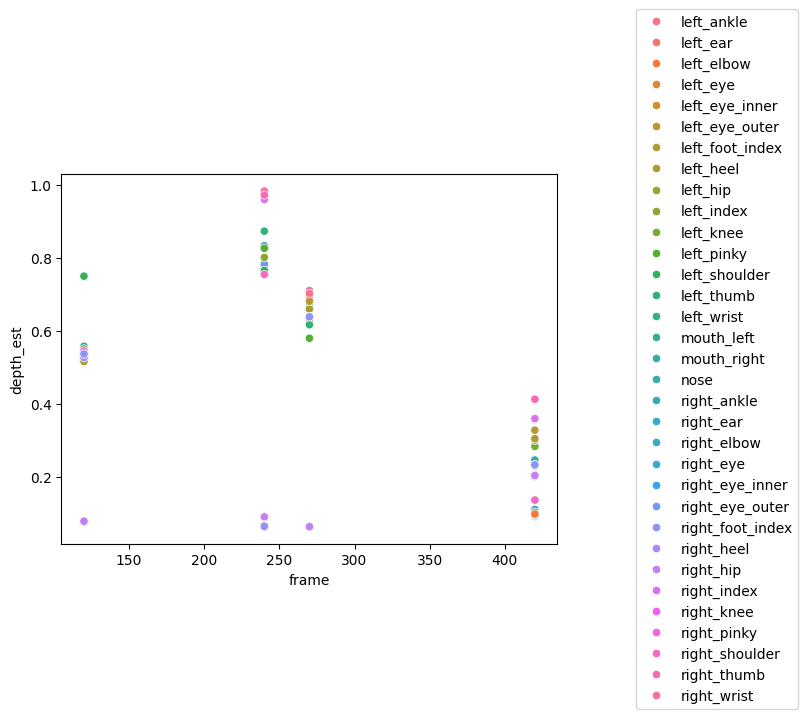

In [8]:
# plot all marigold markers 
sns.scatterplot(x = 'frame', y = 'depth_est', hue = 'label', data = mgold_df)
plt.legend(loc = 'right', bbox_to_anchor = (1.5, 0.5))

In [11]:
yolo_df.head()

,X,Y,label,frame
0,0.0,0.0,nose,0
1,0.0,0.0,left_eye,0
2,0.0,0.0,right_eye,0
3,0.0,0.0,left_ear,0
4,0.0,0.0,right_ear,0


In [12]:
yolo_df['label'].value_counts()

label
nose              543
left_wrist        543
left_ankle        543
right_knee        543
left_knee         543
right_hip         543
left_hip          543
right_wrist       543
right_elbow       543
left_eye          543
left_elbow        543
right_shoulder    543
left_shoulder     543
right_ear         543
left_ear          543
right_eye         543
right_ankle       543
Name: count, dtype: int64

In [37]:
# hip width in pixels 
r_hip_yolo_df = yolo_df.loc[yolo_df['label'] == 'right_hip']
r_hip_yolo_df.set_index('frame', inplace=True)
l_hip_yolo_df = yolo_df.loc[yolo_df['label'] == 'left_hip']
l_hip_yolo_df.set_index('frame', inplace=True)
r_hip_yolo_df.head()

l_hip_yolo_df = l_hip_yolo_df.copy()
l_hip_yolo_df.loc[:, 'hip_width_x'] = abs(r_hip_yolo_df['X'] - l_hip_yolo_df['X']).rolling(window=10, min_periods = 1).mean()

In [31]:
l_hip_yolo_df.head()

,X,Y,label,hip_width_x
frame,,,,
0,855.21530,119.040160,left_hip,NaN
1,865.11470,93.189575,left_hip,NaN
2,864.12470,94.592990,left_hip,NaN
3,862.68400,93.278290,left_hip,NaN
4,860.99805,93.366300,left_hip,NaN


<Axes: xlabel='frame', ylabel='hip_width_x'>

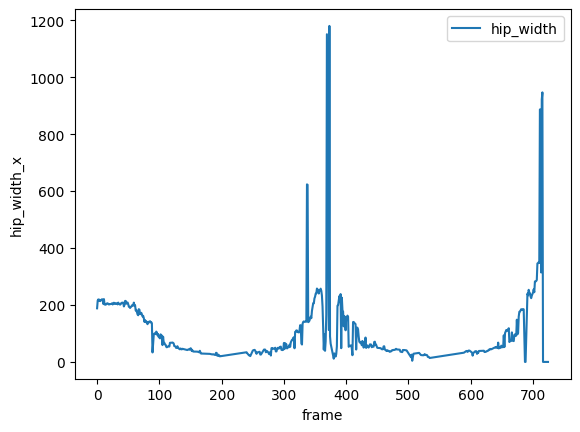

In [25]:
sns.lineplot(x = 'frame', y = 'hip_width_x', data = l_hip_yolo_df, label = 'hip_width')

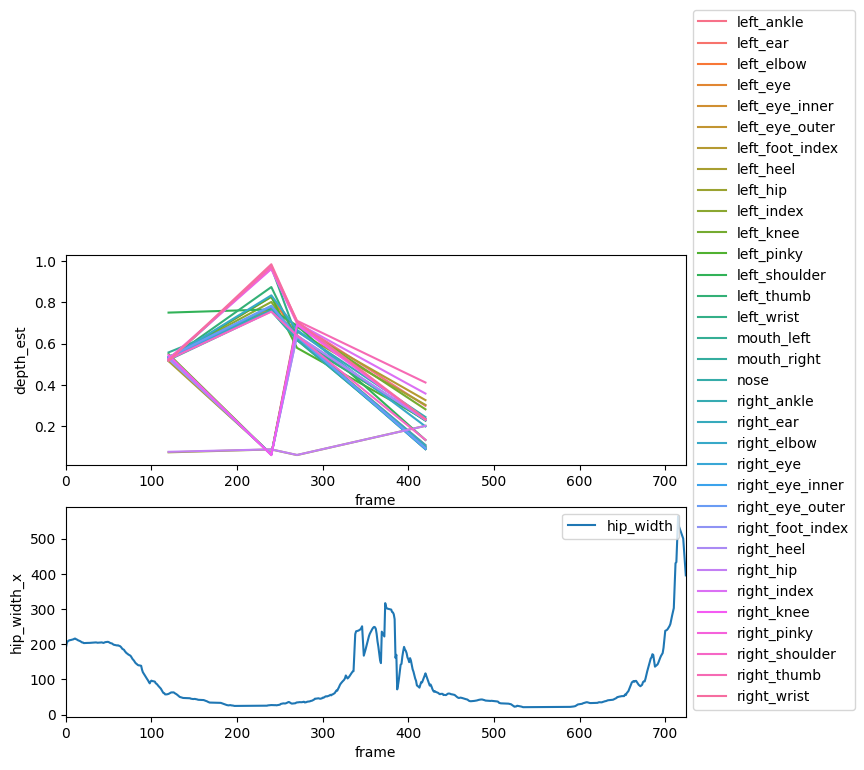

In [51]:
# plot both marigold depth and hip width 
max_frame = yolo_df['frame'].max()

fig, axs = plt.subplots(2, 1, figsize=(8, 6))
sns.lineplot(x = 'frame', y = 'depth_est', hue = 'label', data = mgold_df, ax = axs[0])
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
axs[0].set_xlim(0, max_frame) 

sns.lineplot(x = 'frame', y = 'hip_width_x', data = l_hip_yolo_df, label = 'hip_width', ax = axs[1])
axs[1].legend(loc = 'upper right')
axs[1].set_xlim(0, max_frame) 
plt.show()
fig.savefig(r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\zeno_video_output\BW-0002\2022_09_12\FW_depth_hip_width.png',
           bbox_inches = 'tight')

In [ ]:
# ideas 
# ratio 